Linear regression equation (estimate):
  y_hat = 25.1429 + 22.1429 * x

Baseline (mean of actual y): 65.000
R^2: 0.9891
MSE: 3.0286

Prediction + SHAP table:
 x (samples)  Actual y  Predicted y  Baseline (avg y)  SHAP Value (y_pred - baseline)  Interpretation
           1        45       47.286              65.0                         -17.714 Pred < Baseline
           2        70       69.429              65.0                           4.429 Pred > Baseline
           3        90       91.571              65.0                          26.571 Pred > Baseline
           1        48       47.286              65.0                         -17.714 Pred < Baseline
           2        72       69.429              65.0                           4.429 Pred > Baseline

Saved results table to: freshsip_regression_shap_table.csv
Saved scatter+regression plot to: freshsip_regression_plot.png


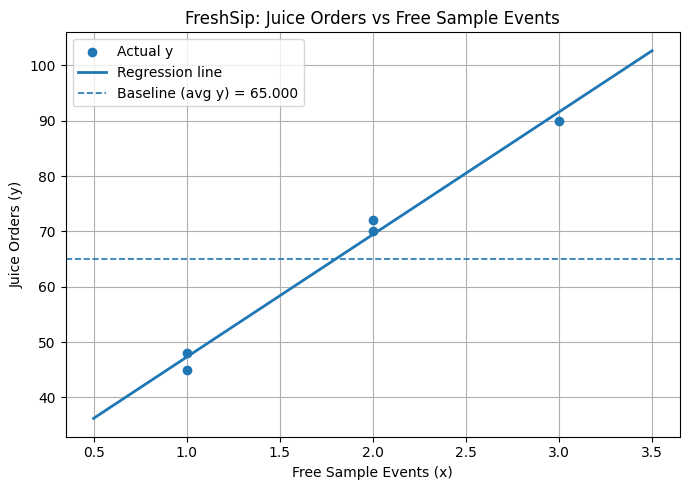

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
x_vals = np.array([1, 2, 3, 1, 2])
y_vals = np.array([45, 70, 90, 48, 72])

X = x_vals.reshape(-1, 1)
model = LinearRegression().fit(X, y_vals)
b = model.coef_[0]
a = model.intercept_
y_pred = model.predict(X)
baseline = y_vals.mean()
shap_values = y_pred - baseline
df = pd.DataFrame({
    "x (samples)": x_vals,
    "Actual y": y_vals,
    "Predicted y": np.round(y_pred, 3),
    "Baseline (avg y)": np.round(baseline, 3),
    "SHAP Value (y_pred - baseline)": np.round(shap_values, 3),
})

def interpret_row(row):
    if row["Predicted y"] > baseline:
        return "Pred > Baseline"
    elif row["Predicted y"] < baseline:
        return "Pred < Baseline"
    else:
        return "Pred = Baseline"

df["Interpretation"] = df.apply(interpret_row, axis=1)
r2 = r2_score(y_vals, y_pred)
mse = mean_squared_error(y_vals, y_pred)
print("Linear regression equation (estimate):")
print(f"  y_hat = {a:.4f} + {b:.4f} * x")
print()
print(f"Baseline (mean of actual y): {baseline:.3f}")
print(f"R^2: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print()
print("Prediction + SHAP table:")
print(df.to_string(index=False))

csv_path = "freshsip_regression_shap_table.csv"
df.to_csv(csv_path, index=False)
print(f"\nSaved results table to: {csv_path}")
plt.figure(figsize=(7,5))
plt.scatter(x_vals, y_vals, label="Actual y", zorder=3)
x_line = np.linspace(x_vals.min() - 0.5, x_vals.max() + 0.5, 100).reshape(-1,1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, label="Regression line", linewidth=2)

plt.axhline(baseline, linestyle='--', linewidth=1.2, label=f"Baseline (avg y) = {baseline:.3f}")
plt.xlabel("Free Sample Events (x)")
plt.ylabel("Juice Orders (y)")
plt.title("FreshSip: Juice Orders vs Free Sample Events")
plt.legend()
plt.grid(True)
plot_path = "freshsip_regression_plot.png"
plt.tight_layout()
plt.savefig(plot_path, dpi=150)
print(f"Saved scatter+regression plot to: {plot_path}")
plt.show()



--- Regression Equation ---
y_hat = 28.2609 + (0.5894 * Emails) + (14.2995 * TopicScore)

--- Baseline Attendance ---
Baseline (mean y) = 174.00

--- Model Performance ---
R² = 0.9957, MSE = 5.6039

--- Prediction + SHAP Breakdown ---
 Emails Sent  Topic Score  Actual Attendance  Predicted Attendance  Baseline  SHAP (Emails)  SHAP (Topic)  Pred from SHAP  Residual (Actual - Pred) Interpretation
         100            8                200                201.59     174.0           4.71         22.88          201.59                     -1.59  Overestimated
          80            6                160                161.21     174.0          -7.07         -5.72          161.21                     -1.21  Overestimated
         120            9                230                227.68     174.0          16.50         37.18          227.68                      2.32 Underestimated
          90            5                150                152.80     174.0          -1.18        -20.02       

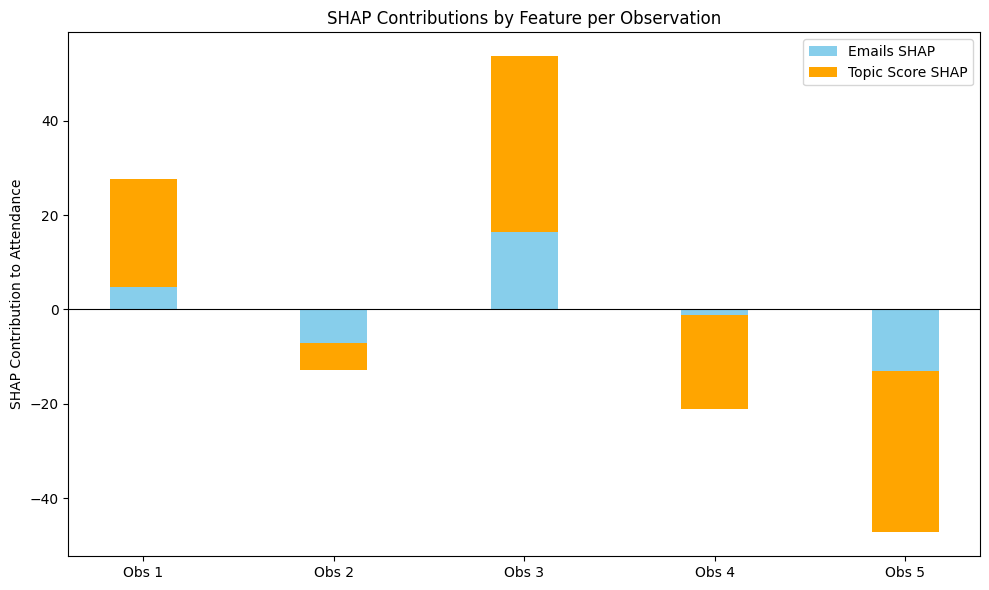

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

emails = np.array([100, 80, 120, 90, 70])
topic_score = np.array([8, 6, 9, 5, 4])
attendance = np.array([200, 160, 230, 150, 130])

X = np.column_stack([emails, topic_score])

model = LinearRegression().fit(X, attendance)
coef_emails, coef_topic = model.coef_
intercept = model.intercept_

y_pred = model.predict(X)

baseline = attendance.mean()
mean_emails = emails.mean()
mean_topic = topic_score.mean()

shap_emails = coef_emails * (emails - mean_emails)
shap_topic = coef_topic * (topic_score - mean_topic)
pred_from_shap = baseline + shap_emails + shap_topic
residuals = attendance - y_pred

df = pd.DataFrame({
    "Emails Sent": emails,
    "Topic Score": topic_score,
    "Actual Attendance": attendance,
    "Predicted Attendance": np.round(y_pred, 2),
    "Baseline": round(baseline, 2),
    "SHAP (Emails)": np.round(shap_emails, 2),
    "SHAP (Topic)": np.round(shap_topic, 2),
    "Pred from SHAP": np.round(pred_from_shap, 2),
    "Residual (Actual - Pred)": np.round(residuals, 2),
    "Interpretation": [
        "Overestimated" if r < 0 else ("Underestimated" if r > 0 else "Exact")
        for r in residuals
    ]
})

r2 = r2_score(attendance, y_pred)
mse = mean_squared_error(attendance, y_pred)

print("\n--- Regression Equation ---")
print(f"y_hat = {intercept:.4f} + ({coef_emails:.4f} * Emails) + ({coef_topic:.4f} * TopicScore)")

print("\n--- Baseline Attendance ---")
print(f"Baseline (mean y) = {baseline:.2f}")

print("\n--- Model Performance ---")
print(f"R² = {r2:.4f}, MSE = {mse:.4f}")

print("\n--- Prediction + SHAP Breakdown ---")
print(df.to_string(index=False))
plt.figure(figsize=(10, 6))
bar_width = 0.35
indices = np.arange(len(emails))

plt.bar(indices, shap_emails, bar_width, label="Emails SHAP", color="skyblue")
plt.bar(indices, shap_topic, bar_width, bottom=shap_emails, label="Topic Score SHAP", color="orange")


plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(indices, [f"Obs {i+1}" for i in range(len(emails))])
plt.ylabel("SHAP Contribution to Attendance")
plt.title("SHAP Contributions by Feature per Observation")
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="Y")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)
coefs = model.coef_
intercept = model.intercept_
baseline = y_train.mean()

mean_train = X_train.mean()
shap_values = (X_test - mean_train) * coefs

pred_from_shap = baseline + shap_values.sum(axis=1)

y_pred = model.predict(X_test)

residuals = y_test - y_pred
df_results = X_test.copy()
df_results["Actual"] = y_test.values
df_results["Predicted"] = np.round(y_pred, 2)
df_results["Baseline"] = round(baseline, 2)

for i, feat in enumerate(X_test.columns):
    df_results[f"SHAP({feat})"] = np.round(shap_values.iloc[:, i], 2)

df_results["Pred from SHAP"] = np.round(pred_from_shap, 2)
df_results["Residual"] = np.round(residuals, 2)
df_results["Interpretation"] = [
    "Overpredicted" if r < 0 else ("Underpredicted" if r > 0 else "Exact")
    for r in residuals
]

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\n--- Regression Equation ---")
coef_str = " + ".join([f"({c:.4f} * {f})" for c, f in zip(coefs, X.columns)])
print(f"y_hat = {intercept:.4f} + {coef_str}")

print("\n--- Baseline ---"
)
print(f"Baseline (mean y in training set) = {baseline:.2f}")

print("\n--- Model Performance ---")
print(f"R² = {r2:.4f}, MSE = {mse:.4f}")

print("\n--- First 5 Predictions with SHAP Breakdown ---")
print(df_results.head().to_string(index=False))

df_results.to_csv("diabetes_regression_shap_results.csv", index=False)
print("\nFull results saved to 'diabetes_regression_shap_results.csv'")


--- Regression Equation ---
y_hat = 151.3456 + (37.9040 * age) + (-241.9644 * sex) + (542.4288 * bmi) + (347.7038 * bp) + (-931.4888 * s1) + (518.0623 * s2) + (163.4200 * s3) + (275.3179 * s4) + (736.1989 * s5) + (48.6707 * s6)

--- Baseline ---
Baseline (mean y in training set) = 153.74

--- Model Performance ---
R² = 0.4526, MSE = 2900.1936

--- First 5 Predictions with SHAP Breakdown ---
     age       sex       bmi        bp        s1        s2        s3        s4        s5        s6  Actual  Predicted  Baseline  SHAP(age)  SHAP(sex)  SHAP(bmi)  SHAP(bp)  SHAP(s1)  SHAP(s2)  SHAP(s3)  SHAP(s4)  SHAP(s5)  SHAP(s6)  Pred from SHAP  Residual Interpretation
0.045341 -0.044642 -0.006206 -0.015999  0.125019  0.125198  0.019187  0.034309  0.032432 -0.005220   219.0     139.55    153.74       1.66      10.85      -4.31     -5.97   -116.97     65.28      3.30      9.34     22.98     -0.35          139.55     79.45 Underpredicted
0.092564 -0.044642  0.036907  0.021872 -0.024960 -0.016658  0

Baseline (mean final grade): 10.325949367088608

First 10 predictions with SHAP sum:
   Actual  Predicted   Baseline  SHAP Sum  \
0      10   6.001607  10.325949 -4.629297   
1      12  11.528478  10.325949  0.897575   
2       5   2.866437  10.325949 -7.764467   
3      10   8.796631  10.325949 -1.834273   
4       9   8.553106  10.325949 -2.077797   
5      13  11.889641  10.325949  1.258737   
6      18  19.096742  10.325949  8.465838   
7       6   7.173079  10.325949 -3.457825   
8       0   7.405071  10.325949 -3.225833   
9      14  12.311537  10.325949  1.680633   

                                      Interpretation  
0  Underpredicted — possible underestimation of c...  
1  Underpredicted — possible underestimation of c...  
2  Underpredicted — possible underestimation of c...  
3  Underpredicted — possible underestimation of c...  
4  Underpredicted — possible underestimation of c...  
5  Underpredicted — possible underestimation of c...  
6  Overpredicted — possible overes

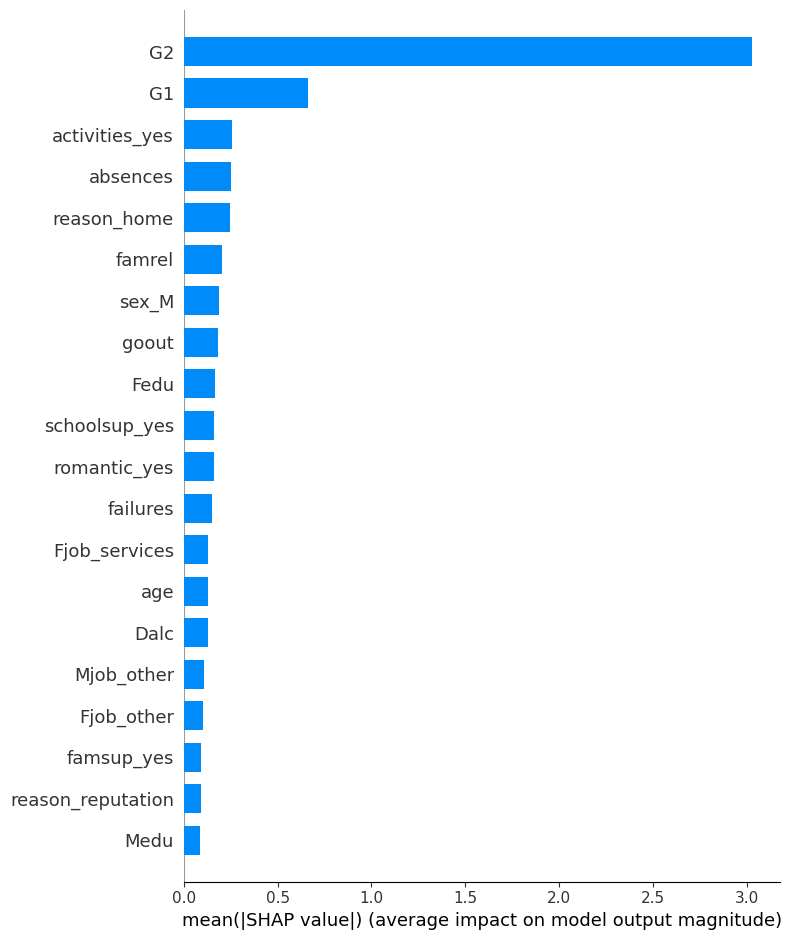

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
import requests
from zipfile import ZipFile
from io import BytesIO

url = "https://archive.ics.uci.edu/static/public/320/student+performance.zip"
response = requests.get(url)
response.raise_for_status()
with ZipFile(BytesIO(response.content)) as z:
    with z.open('student.zip') as inner_zip:

        with ZipFile(BytesIO(inner_zip.read())) as inner_z:
             with inner_z.open('student-mat.csv') as f:
                df = pd.read_csv(f, sep=';')


df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

baseline_value = y_train.mean()

y_pred = model.predict(X_test)
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred,
    "Baseline": baseline_value
})

results["SHAP Sum"] = shap_values.values.sum(axis=1)

interpretations = []
for i in range(len(results)):
    diff = results.loc[i, "Predicted"] - results.loc[i, "Actual"]
    if diff > 0:
        interpretations.append("Overpredicted — possible overestimation of contributing features")
    elif diff < 0:
        interpretations.append("Underpredicted — possible underestimation of contributing features")
    else:
        interpretations.append("Perfect prediction")
results["Interpretation"] = interpretations

print("Baseline (mean final grade):", baseline_value)
print("\nFirst 10 predictions with SHAP sum:")
print(results.head(10))
shap.summary_plot(shap_values, X_test, plot_type="bar")